In [ ]:
import kerastuner as kt

## Load data

In [2]:
# Import the dataset loading function from sklearn
from sklearn.datasets import load_digits

# Load the hand-written digits dataset
digits = load_digits()

# Get the images and corresponding labels
images, labels = digits.images, digits.target
images.shape, labels.shape

((1797, 8, 8), (1797,))

## Exploratory data analysis & Data preprocessing &  feature engineering

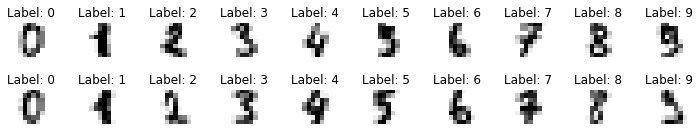

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# plot first 20 images
n = 20
_, axes = plt.subplots(2, 10, figsize=(10, 2))
plt.tight_layout()
for i in range(n):
    row, col = i // 10, i % 10
    axes[row, col].set_axis_off()
    axes[row, col].imshow(images[i,], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[row, col].set_title('Label: %i' % labels[i])

In [14]:
# reshape images to vectors
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
X.shape

(1797, 64)

In [16]:
# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, shuffle=False)

print("Shape of the training data: {}".format(X_train.shape))
print("Shape of the testing data: {}".format(X_test.shape))

Shape of the training data: (1437, 64)
Shape of the testing data: (360, 64)


In [17]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

## KerasTuner tuning: joint hyperparameter tuning and model selection

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model

# hp.Float('alpha', 1e-3, 1, sampling='log')

def build_model(hp):
    model_type = hp.Choice('model_type', ['SVC', 'random_forest'])
    if model_type == 'SVC':
        with hp.conditional_scope('model_type', 'SVC'):
            model = SVC(C=hp.Choice([0.05, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]), 
                        kernel=hp.Choice(['linear', 'rbf']), 
                        random_state=42
                       )
    elif model_type == 'random_forest':
        with hp.conditional_scope('model_type', 'random_forest'):
            model = ensemble.RandomForestClassifier(
                n_estimators=hp.Int('n_estimators', 10, 50, step=10),
                max_depth=hp.Int('max_depth', 3, 10))
    else:
        raise ValueError('Unrecognized model_type')
    return model



tuner = kt.tuners.Sklearn(
        oracle=kt.oracles.BayesianOptimization(
            objective=kt.Objective('score', 'max'),
            max_trials=10),
        hypermodel=build_model,
        directory=tmp_dir)
tuner.search(X_train, y_train)

NameError: name 'kt' is not defined

### Build a pipeline

In [50]:
from sklearn.pipeline import Pipeline
image_clf = Pipeline([
    ('pca', PCA(n_components=10)),
    ('clf', SVC(C=1, kernel='linear', random_state=42))from sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import RandomForestClassifierfrom sklearn.ensemble import RandomForestClassifier,])

image_clf.fit(X_train, y_train)

# Test
y_pred_test = image_clf.predict(X_test)

# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} %".format(acc * 100))

The prediction accuracy: 89.44 %


## Sklearn build-in tuning: jointly tune the PCA components and SVC

In [51]:
# Hp tuning with Sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Create a dictionary for all the hyperparameters
hps = {
  'pca__n_components': [2, 5, 10, 20],
  'clf__C': [0.05, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
  'clf__kernel': ['linear', 'rbf'],  
}

# Construct a scoring function for performance estimation.
scoring_fnc = make_scorer(accuracy_score)

# Create the grid search cv object (5-fold cross-validation)
grid_search = GridSearchCV(estimator=image_clf, 
                           param_grid=hps, 
                           scoring=scoring_fnc, 
                           cv=3,
                           verbose=5,
                           n_jobs=-1) 

# Fit the grid search object to the training data to search the optimal model
grid_search = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 338 out of 360 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.1s finished


In [52]:
# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# plt.plot(hps['C'], cvres["mean_test_score"])
# plt.title('Accuracy change with hyperparameter C of SVC (RBF Kernel)')
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.show()

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.5824634655532359 {'clf__C': 0.05, 'clf__kernel': 'linear', 'pca__n_components': 2}
0.8462073764787753 {'clf__C': 0.05, 'clf__kernel': 'linear', 'pca__n_components': 5}
0.9262352122477383 {'clf__C': 0.05, 'clf__kernel': 'linear', 'pca__n_components': 10}
0.9394572025052192 {'clf__C': 0.05, 'clf__kernel': 'linear', 'pca__n_components': 20}
0.5720250521920668 {'clf__C': 0.05, 'clf__kernel': 'rbf', 'pca__n_components': 2}
0.8469032707028532 {'clf__C': 0.05, 'clf__kernel': 'rbf', 'pca__n_components': 5}
0.894224077940153 {'clf__C': 0.05, 'clf__kernel': 'rbf', 'pca__n_components': 10}
0.9018789144050104 {'clf__C': 0.05, 'clf__kernel': 'rbf', 'pca__n_components': 20}
0.58107167710508 {'clf__C': 0.1, 'clf__kernel': 'linear', 'pca__n_components': 2}
0.848990953375087 {'clf__C': 0.1, 'clf__kernel': 'linear', 'pca__n_components': 5}
0.9255393180236604 {'clf__C': 0.1, 'clf__kernel': 'linear', 'pca__n_components': 10}
0.9394572025052192 {'clf__C': 0.1, 'clf__kernel': 'linear', 'pca__n_components'

## Retrive the best model

The best combination of hyperparameters are:
clf__C: 3
clf__kernel: 'rbf'
pca__n_components: 20

The prediction accuracy on training set: 99.93 %
The prediction accuracy on test set: 96.67 %


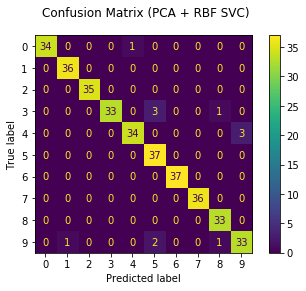

In [59]:
grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Produce the value for 'max_depth'
print("The best combination of hyperparameters are:")

for hp_name in sorted(hps.keys()):
    print("%s: %r" % (hp_name, grid_search.best_params_[hp_name]))

# Model prediction on training & test data
y_pred_train = best_pipeline.predict(X_train)
y_pred_test = best_pipeline.predict(X_test)

# Display the testing results
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print("\nThe prediction accuracy on training set: {:.2f} %".format(train_acc * 100))
print("The prediction accuracy on test set: {:.2f} %".format(test_acc * 100))

disp = plot_confusion_matrix(best_pipeline, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix (PCA + RBF SVC)")

plt.show()

## KerasTuner tuning: jointly tune the PCA components and SVC